# 核心能力提升班商业智能方向 004期 Week 14

### Thinking 1: 常用的路径规划算法有哪些?

1. Dijkstra算法

Dijkstra 算法是一种用于计算带权有向图中单源最短路径（SSSP：Single-Source Shortest Path）的算法。其解决的问题是：给定图$G$和源顶点$v$，找到从$v$至图中所有顶点的最短路径。  
Dijkstra 算法采用贪心算法（Greedy Algorithm）范式进行设计。在最短路径问题中，对于带权有向或无向图 $G=(V,E)$，Dijkstra 算法的初始实现版本未使用最小优先队列实现，其时间复杂度为$O(V^2)$。  
基于 Fibonacci heap 的最小优先队列实现版本，其时间复杂度为$O(E+VlogV)$。缺点是不能处理含负权值边的图。  

2. Bellman-Ford 算法

Bellman–Ford 算法是求解单源最短路径问题的另外一种算法。它的原理是对图进行$V−1$次松弛操作，得到所有可能的最短路径。其优于Dijkstra算法的方面是边的权值可以为负数、实现简单，缺点是时间复杂度过高，高达$O(V∗E)$。

3. Johnson算法

Johnson算法主要用于求稀疏图上的所有节点对的最短路径。其主体思想是利用重新赋予权值的方法把一个原问题带负权的图转化为权值非负的图。然后再对每个节点使用一次Dijkstra算法以求出所有节点对的最短路径。时间复杂度为$O(VE+V^2logV)$。

4. Floyd-Warshall算法

Floyd-Warshall算法中文亦称弗洛伊德算法，是解决任意两点间的最短路径的一种算法，可以正确处理有向图或负权（但不可存在负权回路）的最短路径问题，同时也被用于计算有向图的传递闭包。  
Floyd-Warshall算法采用了动态规划思想，时间复杂度为$O(N^3)$，空间复杂度为$O(N^2)$。  
对于一个完全连通图，无向图一共有$(V∗V−1)/2$条边，有向图有$(V∗V−1)$条边，由于$(V∗V−1)≈V^2$，所以有$O(VE+V^2logV)<O(V^3)$，理论上Floyd的效率与Johnson相当。  
但是实现上来看，Johnson用了斐波那契堆优化后的Dijkstra算法实现较繁琐，Floyd实现则更简单）。由于实际中Floyd的内循环的操作成本更低，使其实际运行时间效率也比Johnson算法明显高。  

5. SPFA算法

SPFA（Shortest Path Faster Algorithm）（队列优化）算法是求单源最短路径的一种算法，它还有一个重要的功能是判负环（在差分约束系统中会得以体现），在Bellman-ford算法的基础上加上一个队列优化，减少了冗余的松弛操作，是一种高效的最短路算法。

6. A*搜索算法

A*搜索算法，俗称A星算法。这是一种在图形平面上，有多个节点的路径，求出最低通过成本的算法。常用于游戏中的NPC的移动计算，或网络游戏的BOT的移动计算上。

该算法综合了Best-First Search和Dijkstra算法的优点：在进行启发式搜索提高算法效率的同时，可以保证找到一条最优路径（基于评估函数）。

在此算法中，如果以$g(n)$表示从起点到任意顶点n的实际距离， $h(n)$表示任意顶点$n$到目标顶点的估算距离（根据所采用的评估函数的不同而变化），那么A*算法的估算函数为：$f(n)=g(n)+h(n)$。这个公式遵循以下特性：

* 如果$g(n)$为0，即只计算任意顶点n到目标的评估函数$h(n)$，而不计算起点到顶点n的距离，则算法转化为使用贪心策略的Best-First Search，速度最快，但可能得不出最优解；
* 如果$h(n)$不高于实际到目标顶点的距离，则一定可以求出最优解，而且$h(n)$越小，需要计算的节点越多，算法效率越低，常见的评估函数有——欧几里得距离、曼哈顿距离、切比雪夫距离；
* 如果$h(n)$为0，即只需求出起点到任意顶点n的最短路径$g(n)$，而不计算任何评估函数$h(n)$，则转化为单源最短路径问题，即Dijkstra算法，此时需要计算最多的定点。

### Thinking 2: 推荐系统的架构是怎样的？

下图所示是业界推荐系统通用架构图，主要包括：底层基础数据、数据加工存储、召回内容、计算排序、过滤和展示、业务应用。
底层基础数据是推荐系统的基石，只有数据量足够多，才能从中挖掘出更多有价值的信息，进而更好地为推荐系统服务。底层基础数据包括用户和物品本身数据、用户行为数据、用户系统上报数据等。
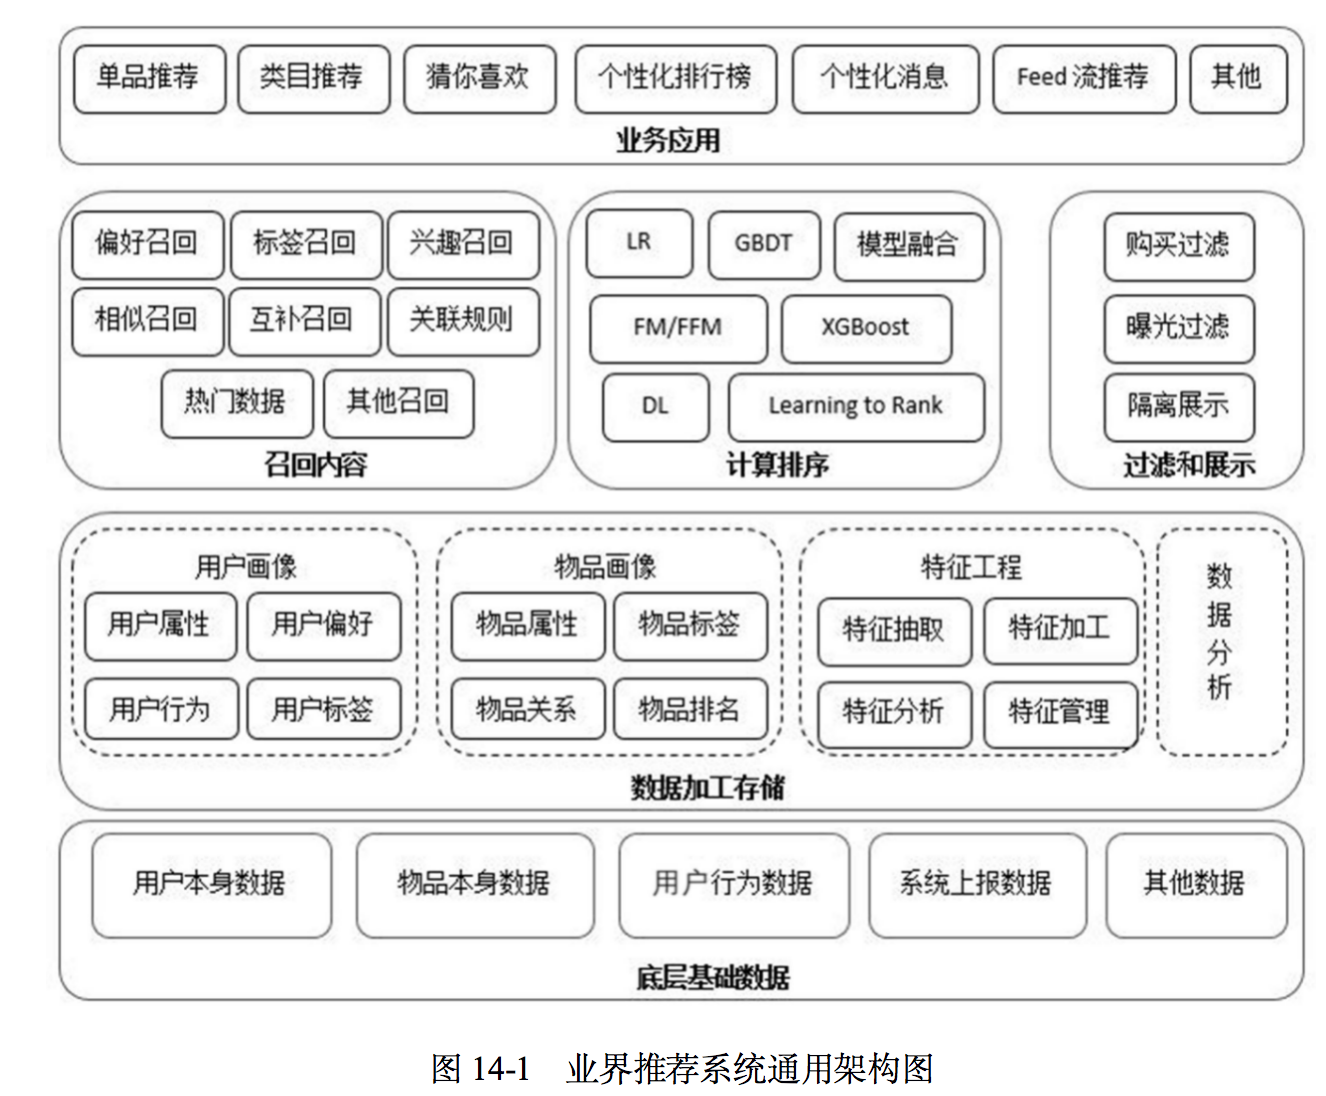

### Thinking 3: 你都了解推荐系统中的哪些常用算法？原理是怎样的？

### 1. 基于标签的推荐
这是最为简单的一种推荐算法，它只是简单的根据系统用户的基本信息发现用户的相关程度，然后将相似用户喜爱的其他物品推荐给当前用户。  
系统首先会根据用户的属性建模，比如用户的年龄，性别，兴趣等信息。根据这些特征计算用户间的相似度。比如系统通过计算发现用户A和C比较相似。就会把A喜欢的物品推荐给C。  

#### 优势：
* 不需要历史数据，没有冷启动问题。
* 不依赖于物品的属性，因此其他领域的问题都可无缝接入。  

#### 不足：
* 算法比较粗糙，效果很难令人满意，只适合简单的推荐  

### 2. 基于内容的推荐
与上面的方法相类似，只不过这次的中心转到了物品本身。使用物品本身的相似度而不是用户的相似度。    
系统首先对物品（图中举电影的例子）的属性进行建模，图中用类型作为属性。在实际应用中，只根据类型显然过于粗糙，还需要考虑演员，导演等更多信息。通过相似度计算，发现电影A和C相似度较高，因为他们都属于爱情类。系统还会发现用户A喜欢电影A，由此得出结论，用户A很可能对电影C也感兴趣。于是将电影C推荐给A。

#### 优势：
* 对用户兴趣可以很好的建模，并通过对物品属性维度的增加，获得更好的推荐精度  

#### 不足： 
* 物品的属性有限，很难有效的得到更多数据  
* 物品相似度的衡量标准只考虑到了物品本身，有一定的片面性  
* 需要用户的物品的历史数据，有冷启动的问题  

### 3. 协同过滤
协同过滤分为基于用户的协同过滤和基于物品的协同过滤。  
* 基于用户的协同过滤  
基于用户的协同过滤推荐机制是计算用户的相似度，并基于“邻居”用户群计算推荐，基于用户的协同过滤机制是在用户的历史偏好的数据上计算用户的相似度，它的基本假设是，喜欢类似物品的用户 可能有相同或者相似的口味和偏好。  
* 基于物品的协同过滤  
基于项目的协同过滤推荐其实是基于物品相似度预测推荐，是基于物品本身的属性特征信息。  

#### 协同过滤的优势：
* 它不需要对物品或者用户进行严格的建模，而且不要求物品的描述是机器可理解的，所以这种方法也是领域无关的。  
* 这种方法计算出来的推荐是开放的，可以共用他人的经验，很好的支持用户发现潜在的兴趣偏好  

#### 不足：
* 方法的核心是基于历史数据，所以对新物品和新用户都有“冷启动”的问题。  
* 推荐的效果依赖于用户历史偏好数据的多少和准确性。  
* 在大部分的实现中，用户历史偏好是用稀疏矩阵进行存储的，而稀疏矩阵上的计算有些明显的问题，包括可能少部分人的错误偏好会对推荐的准确度有很大的影响等等。  
* 对于一些特殊品味的用户不能给予很好的推荐。  
* 由于以历史数据为基础，抓取和建模用户的偏好后，很难修改或者根据用户的使用演变，从而导致这个方法不够灵活。  

### 4. 混合推荐算法
Amazon这样的系统都是混合使用各种推荐算法，各取所长。因此我们在使用时，也要多考虑一下什么情况下更适合使用哪种算法，来提高系统的效率。

### Thinking 4: 我们在课上讲解过常用的机器学习，深度学习模型，推荐系统算法，以及启发式算法，路径规划原理等，针对这些模块，请你针对其中一个进行思维导图梳理

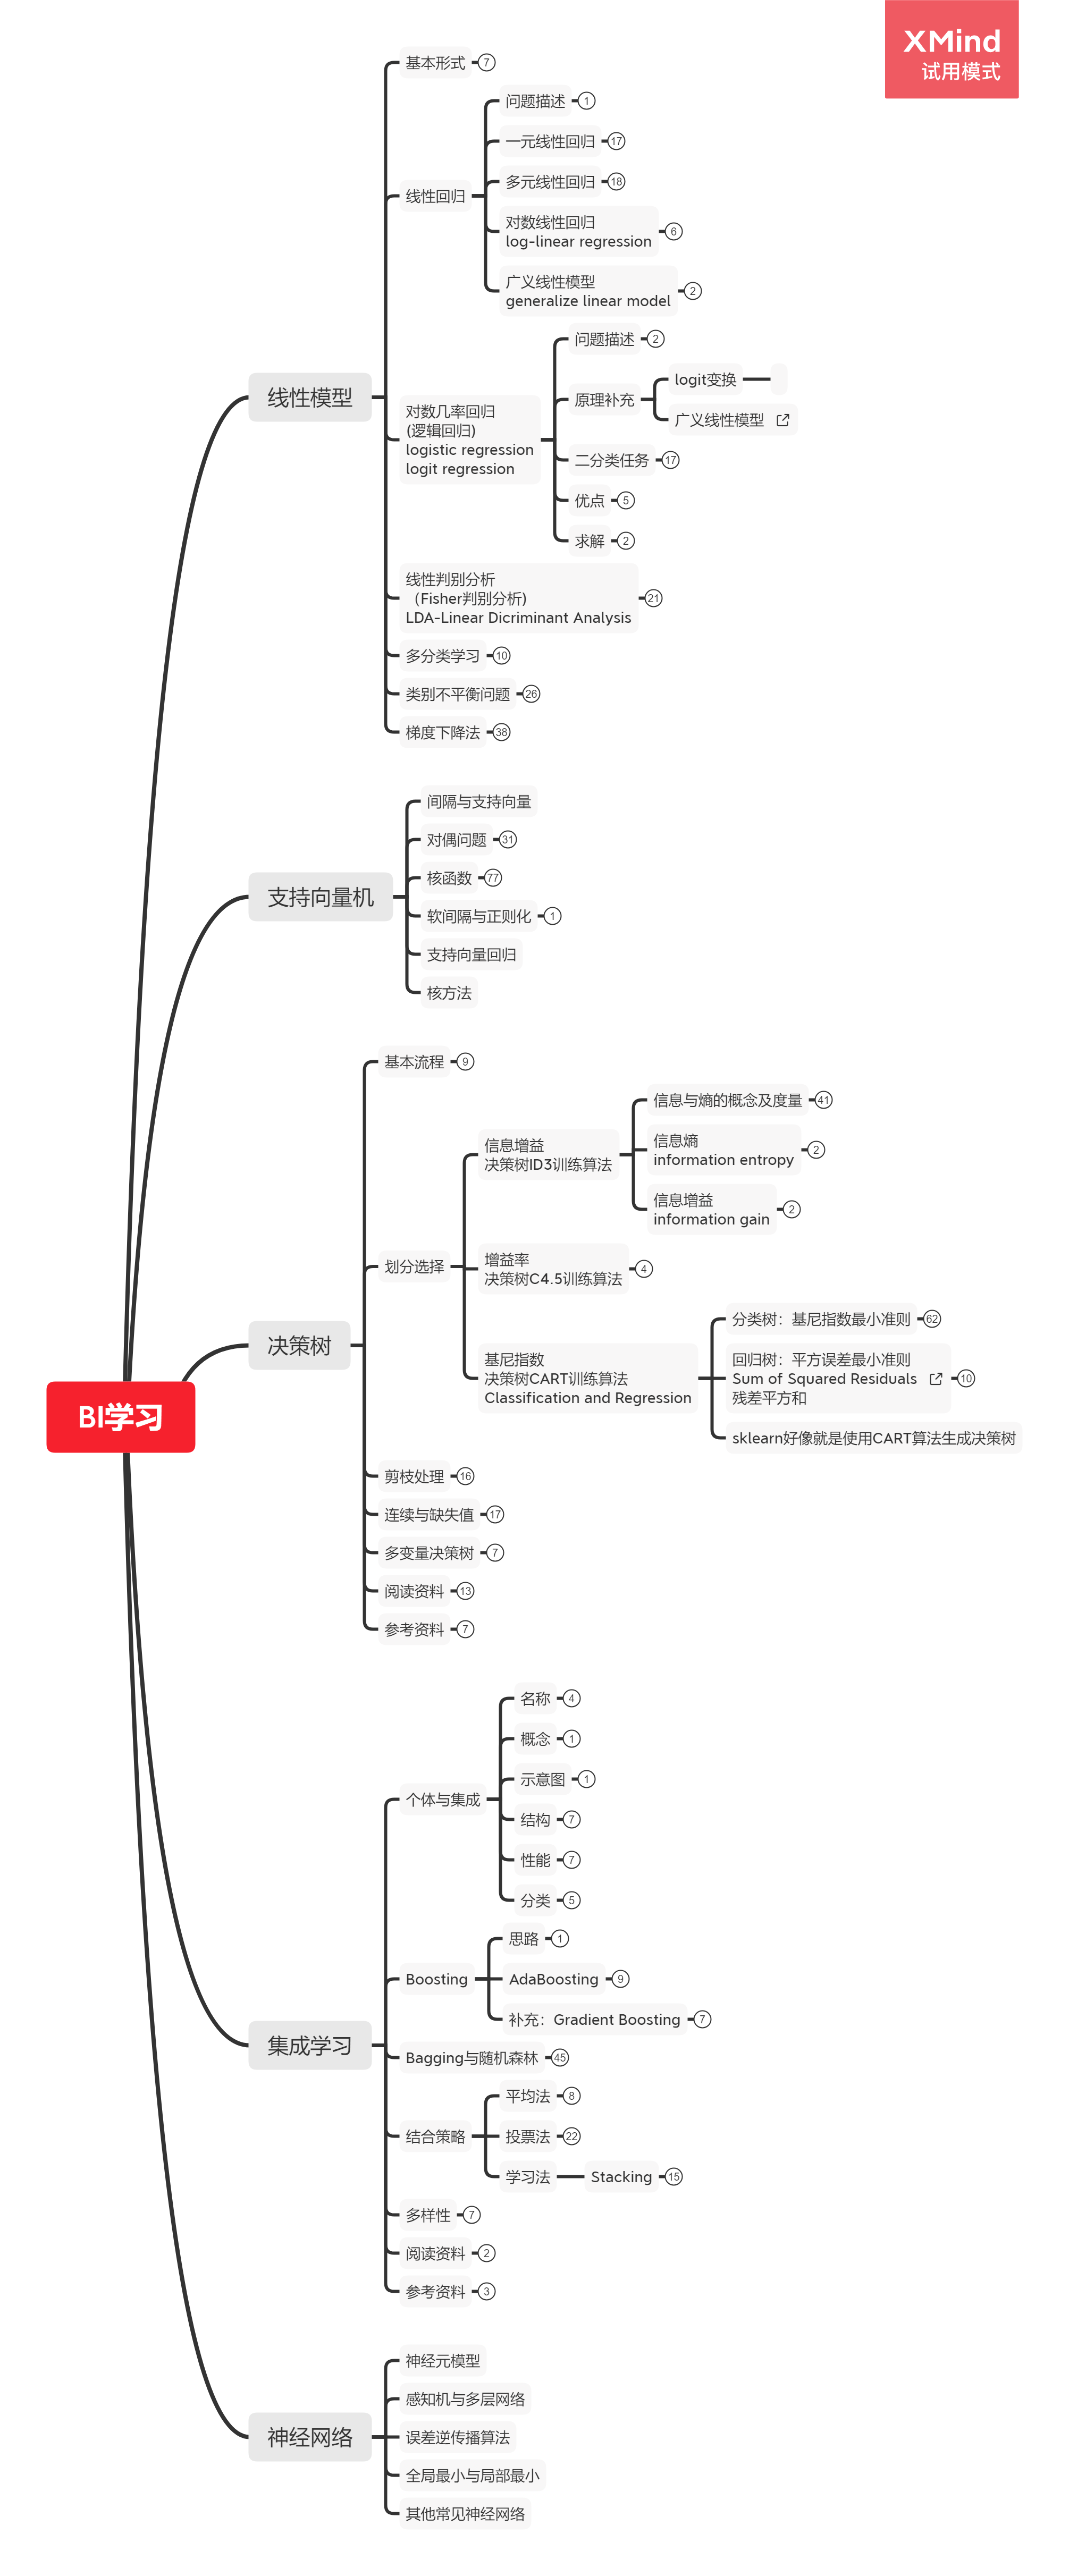

### Action 1: 基于高德地图的路径规划
从指定地点start，到终点end的路径规划  
最优路径定义：  
1）距离最短  
2）时间最短  
输入：start,end  
输出：路径规划，所需的距离、时间  

### Step1，数据采集

In [1]:
# 获得指定城市的地铁路线
import requests
from bs4 import BeautifulSoup
def get_page_content(request_url):
    # 得到页面的内容
    header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
    html = requests.get(request_url, headers=header, timeout=10)
    content = html.text
    # 通过content创建BS对象
    soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
    return soup

In [2]:
import pandas as pd
request_url = 'https://ditie.mapbar.com/beijing_line'
soup = get_page_content(request_url)
subways = soup.find_all('div', class_='station')
df = pd.DataFrame(columns=['name', 'site'])
for subway in subways:
    # 得到地铁线路名称
    route_name = subway.find('strong', class_='bolder').text
    # 找到该线路中每一站的名称
    routes = subway.find('ul')
    routes = routes.find_all('a')
    for route in routes:
        temp = {'name': route.text, 'site': route_name}
        df = df.append(temp, ignore_index=True)
df

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/bs4/__init__.py:221: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


,name,site
0,四惠站,地铁八通线
1,四惠东站,地铁八通线
2,高碑店站,地铁八通线
3,传媒大学站,地铁八通线
4,双桥站,地铁八通线
...,...,...
346,永丰站,地铁16号线
347,永丰南站,地铁16号线
348,西北旺站,地铁16号线
349,马连洼站,地铁16号线


In [3]:
df['city'] = '北京'
# df.to_excel('subway.xlsx', index=False)

### Step2，获取地点的坐标（经度、维度）
使用高德地图API，获取指定地点的所在经度、维度，比如五道口的坐标

In [4]:
# 添加经度longitude, 维度 latitude
def get_location(keyword, city, api_key='458bed9ee043aa9ce479377b891efd9a'):
    header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
    request_url = 'http://restapi.amap.com/v3/place/text?key='+api_key+\
    '&keywords='+keyword+\
    '&types=&city='+city+\
    '&children=1&offset=1&page=1&extensions=all'
    data = requests.get(request_url, headers=header)
    data.encoding='utf-8'
    data = data.json()
    try:
        result = data['pois'][0]['location'].split(',')
        return result
    except:
        return get_location(keyword.replace('站', ''), city)

In [5]:
get_location('五道口', '北京')

['116.337742', '39.992894']

In [6]:
from tqdm import tqdm
df['longitude'],df['latitude'] = None, None
for index, row in tqdm(df.iterrows()):
    longitude, latitude = get_location(row['name'], row['city'])
    df.iloc[index]['longitude'] = longitude
    df.iloc[index]['latitude'] = latitude
df

351it [01:16,  4.60it/s]


,name,site,city,longitude,latitude
0,四惠站,地铁八通线,北京,116.498489,39.908279
1,四惠东站,地铁八通线,北京,116.514954,39.908051
2,高碑店站,地铁八通线,北京,115.858715,39.329044
3,传媒大学站,地铁八通线,北京,116.554639,39.909215
4,双桥站,地铁八通线,北京,116.569999,39.900706
...,...,...,...,...,...
346,永丰站,地铁16号线,北京,116.238481,40.071868
347,永丰南站,地铁16号线,北京,116.248154,40.065575
348,西北旺站,地铁16号线,北京,116.257923,40.048703
349,马连洼站,地铁16号线,北京,116.272520,40.032637


In [7]:
df.to_excel('subway.xlsx', index=False)

In [8]:
data = df

### Step3，计算两点之间的距离
使用高德地图API，获取指定两点之间的距离，比如从五道口到知春路

In [2]:
import pandas as pd
data = pd.read_excel('subway.xlsx')

In [4]:
# 计算两点之间的距离
def compute_distance(longitude1, latitude1, longitude2, latitude2, api_key='458bed9ee043aa9ce479377b891efd9a'):
    header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
    request_url = 'http://restapi.amap.com/v3/distance?key='+api_key+\
    '&origins='+str(longitude1)+','+str(latitude1)+\
    '&destination='+str(longitude2)+','+str(latitude2)+\
    '&type=1'
    data = requests.get(request_url, headers=header)
    data.encoding='utf-8'
    data = data.json()
    return data['results'][0]['distance'], data['results'][0]['duration']

In [7]:
from collections import defaultdict
from tqdm import tqdm
import requests
# 保存图中两点之间的距离
graph = defaultdict(dict)
for i in tqdm(range(data.shape[0])):
    site1 = data.iloc[i]['site']
    if i < data.shape[0]-1:
        site2 = data.iloc[i+1]['site']
        # 如果是同一条线路
        if site1 == site2:
            longitude1, latitude1 = data.iloc[i]['longitude'], data.iloc[i]['latitude']
            longitude2, latitude2 = data.iloc[i+1]['longitude'], data.iloc[i+1]['latitude']
            name1 = data.iloc[i]['name']
            name2 = data.iloc[i+1]['name']
            # 按照距离， 计算两点之间的距离
            distance, duration = compute_distance(longitude1, latitude1, longitude2, latitude2)
            graph[name1][name2] = distance, duration
            graph[name2][name1] = distance, duration

100%|██████████| 351/351 [00:17<00:00, 19.97it/s]


In [8]:
import pickle
output = open('graph1.pkl', 'wb')
pickle.dump(graph, output)

### Step4，使用Dijkstra计算从start（五道口）到end（北京南站）的最优路径

In [38]:
import pickle
file = open('graph1.pkl', 'rb')
graph = pickle.load(file)

In [39]:
# 找到开销最小的节点
def find_lowest_cost_node(costs):
    # 初始化数据
    # 打擂法，初始最小值为inf
    lowest_cost = float('inf')
    lowest_cost_node = None
    # 遍历所有节点
    for node in costs:
        # 如果该节点没有被处理
        if not node in processed:
            # 如果当前节点的开销比已经存在的开销小，就更新该节点为开销最小的节点
            if costs[node] < lowest_cost:
                lowest_cost = costs[node]
                lowest_cost_node = node
    return lowest_cost_node

In [43]:
# 找到最短路径, 所需距离，时间
def find_shortest_path():
    node = end
    shortest_path = [end]
    distance = 0
    duration = 0
    while parents[node] != start:
        distance += int(graph[node][parents[node]][0])
        duration += int(graph[node][parents[node]][1])
        # 往前移动一步
        node = parents[node]
        # 添加到路径中
        shortest_path.append(node)
    distance += int(graph[node][start][0])
    duration += int(graph[node][start][1])
    shortest_path.append(start)
    return list(reversed(shortest_path)), distance, duration

In [44]:
# 计算图中从start到end的最短路径
def dijkstra():
    # 查询到目前开销最小的节点
    node = find_lowest_cost_node(costs)
    # 使用找到的开销最小节点，计算它的邻居，是否可以通过他进行更新
    # 如果所有节点，都在processed，就结束了
    while node is not None:
        # 获取节点的cost
        cost = costs[node]
        # 获取节点的邻居
        neighbors = graph[node]
        # 遍历所有邻居，看是否可以进行更新
        for neighbor in neighbors.keys():
            # 计算邻居到当前节点 + 当前节点的开销
            new_cost = cost + float(neighbors[neighbor][0])
            if neighbor not in costs or new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                # 经过node到达neighbor节点， cost更少
                parents[neighbor] = node
        # 将当前节点，标记为已处理
        processed.append(node)
        # 下一步，继续找U中最短距离的节点
        node = find_lowest_cost_node(costs)
    # 循环完，说明所有节点已经处理完毕
    shortest_path = find_shortest_path()
    return shortest_path

In [46]:
start = '北京西站'
end = '北工大西门站'
def compute(site1, site2):
    global start, end, costs, parents, processed
    start = site1
    end = site2
    # 创建节点的开销表， cost是指从start到该节点的距离
    costs = {}
    # 存储父节点的HASH表， 用于记录路径
    parents = {}
    parents[end] = None
    # 获取节点相邻的节点
    for node in graph[start].keys():
        costs[node] = float(graph[start][node][0])
        parents[node] = start
    # 终点到起点，设置为无穷大
    costs[end] = float('inf')
    # 记录处理过的节点list
    processed = []
    return dijkstra()

In [47]:
result = compute(start, end)

In [48]:
'从'+start+'到'+end+'需经过'+str(result[0])

"从北京西站到北工大西门站需经过['北京西站', '湾子站', '达官营站', '广安门内站', '菜市口站', '虎坊桥站', '珠市口站', '桥湾站', '磁器口站', '天坛东门站', '蒲黄榆站', '方庄站', '十里河站', '南八里庄站', '北工大西门站']"

In [51]:
'总里程为：'+str(result[1]/1000)+'公里'

'总里程为：43.453公里'

In [54]:
'需要时间：'+str(result[2]/60)+'分钟'

'需要时间：107.0分钟'